In [1]:
from math import exp, sin, cos

def f_1(x):#### Definimos  una función que nos arroja el valor de la función usando 
    return exp(sin(2*x))

def fprime(x): ### Definimos su derivada con respecto a x
    return 2*exp(sin(2*x))*cos(2*x)

def calc_fd(f,x,h): ####  Calculamos la derivada usando la notación corresopondiente a su derivada
    fd = (f(x+h) - f(x))/h
    return fd

def calc_cd(f,x,h): #### Hacemos exactamente lo mismo, pero, usando, como base el punto medio de dicha 
    ### Derivada
    cd = (f(x+h/2) - f(x-h/2))/h
    return cd

hs= [10**(-i) for i in range(1,50)] 

an = fprime(0.5)

x = [ abs(calc_fd(f_1, 0.5, h) - an)  for h in hs ]
y = [ abs(calc_cd(f_1, 0.5, h) - an)  for h in hs ]

x 

[0.30770445833762494,
 0.02603591569007424,
 0.0025550421497806397,
 0.00025501809412364906,
 2.549695425191345e-05,
 2.549266057805255e-06,
 2.5643346734938177e-07,
 1.890184275765705e-08,
 3.7417321063770714e-07,
 2.1505300500379576e-06,
 3.323677473954234e-05,
 0.00012205461670955486,
 0.002342500665959868,
 0.024546961158463,
 0.15777372411348178,
 1.9341305635137322,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.506761534986894,
 2.50

### 3.1 Make sure SymPy is installed on your system; use it to analytically differentiate the function $f (x) = e^{sin(2x)}$. Then, evaluate the derivative at a few points from x = 0 to x = 0.5. Compare the latter values to the output of fprime() from code 3.1.

In [2]:
import sympy as sp
import numpy as np

x = sp.Symbol('x')

def sym_der(x): 
    f = sp.exp(sp.sin(2 * x))*2* sp.cos(2 * x)### Usando las libreria de sympy tenemos los valores de nuestras funciones
    ### Representando las derivadas
    return f 
    
def f_1(x):#### Definimos  una función que nos arroja el valor de la función usando 
    ### L alribreria math de Python
    return exp(sin(2*x))

def calc_fd(f,x,h = 0.00000001): ####  Calculamos la derivada usando la notación corresopondiente a su derivada
    fd = (f(x+h) - f(x))/h
    return fd

def calc_cd(f,x,h=0.000000001): #### Hacemos exactamente lo mismo, pero, usando, como base el punto medio de dicha 
    ### Derivada
    cd = (f(x+h/2) - f(x-h/2))/h
    return cd

xs= [0.0 + 0.01*i  for i in range(1,10)] 

m = [calc_cd(f_1, x) for x in xs]

n = [sym_der(x) for x in xs]

y = [ abs(calc_cd(f_1, x) - sym_der(x)) for x in xs  ]
y


[5.99565757042342e-8,
 6.40123047901398e-8,
 8.43942240535966e-8,
 1.83795609398629e-7,
 1.83901846195766e-7,
 2.21018848112209e-7,
 9.87256258966340e-8,
 1.72922978158851e-8,
 4.19968948506266e-9]

### 3.4  We turn to the fascinating approach of complex-step differentiation. First, Taylor expand f (x+ih) around x, where f is an analytic function; take the imaginary part of both sides and divide by h to show that f ′(x) = Im[ f (x + ih)/h] +O(h2) holds. Then, augment Fig. 3.2 to include results from this new method; you’ll need to employ complex arithmetic. Unmistakably, circumventing catastrophic cancellation pays off.

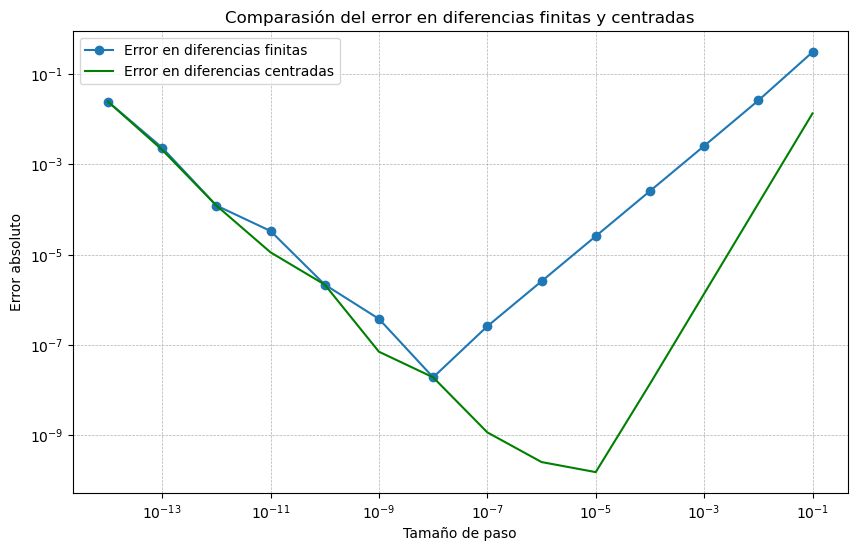

In [3]:
from math import exp, sin, cos
import matplotlib.pyplot as plt

#### Definimos la función a evaluar con nuestros metodos
def f(x):
    return exp(sin(2 * x))

### Obtenemos de manera analitica nuestra derivada
def fprime(x):
    return 2 * exp(sin(2 * x)) * cos(2 * x)

#### Diferencias finitas
def calc_fd(f, x, h):
    return (f(x + h) - f(x)) / h

#### Diferencias centrales 
def calc_cd(f, x, h):
    return (f(x + h / 2) - f(x - h / 2)) / h

if __name__ == '__main__':
    x = 0.5 ### Sobre que x estamos evaluando 
    
    an = fprime(x) ### El valor que realmente agarra la derivada de la derivada
    
    hs = [10**(-i) for i in range(1, 15)] ### creamoss las h que nuestro sistema agarrara
    ### para comparar ambos metodos 
    
    fds = [abs(calc_fd(f, x, h) - an) for h in hs] #### Calcula el error absoluto entre diferentes h´s de 
                                                   #### las diferencias finitas
    cds = [abs(calc_cd(f, x, h) - an) for h in hs] ### lo mismo para diferencias centrales
    
    plt.figure(figsize=(10, 6))
    plt.loglog(hs, fds, 'o-', label='Error en diferencias finitas')
    plt.loglog(hs, cds, 'g-', label='Error en diferencias centradas')
    plt.xlabel('Tamaño de paso')
    plt.ylabel('Error absoluto')
    plt.title('Comparasión del error en diferencias finitas y centradas')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

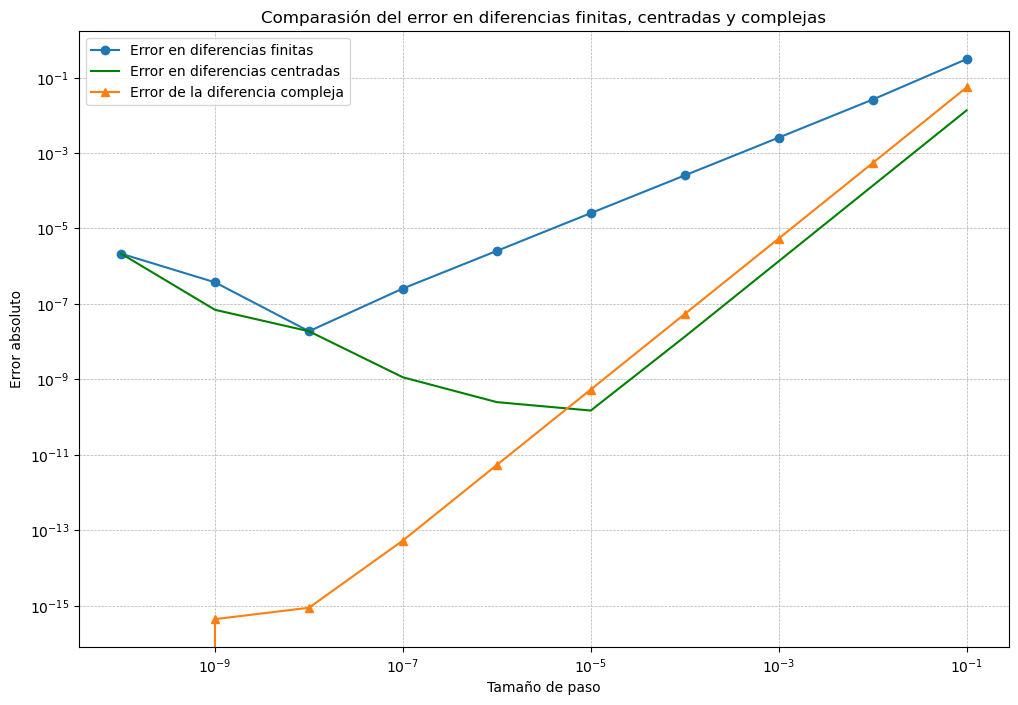

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Usando numpy escribimos la función a derivar
def f(x):
    return np.exp(np.sin(2 *x))
  
### Sacamos de manera analitica  la función
def fprime(x):
    return 2 * np.exp(np.sin(2 * x)) * np.cos(2 *x)

### Diferencias finitas
def calc_fd(f, x, h):
    return (f(x + h) - f(x)) / h

### Diferencias centrales
def calc_cd(f, x, h):
    return (f(x + h / 2) - f(x - h / 2)) / h

###Aproximación  por imaginarios
def calc_csd(f, x, h):
    return np.imag(f(x +  1j*h)) / h

if __name__ == '__main__':
    x = 0.5 ### definimos el valor de la x a evaluar
    an = fprime(x) #### obtenemos el valor de la derivada de manera exacta
    hs = [10**(-i) for i in range(1, 11)] ### Creamos las h que serán utilizada
    
    fds = [abs(calc_fd(f, x, h) - an) for h in hs] ### Obtenemos las diferencias con cada metodo
    cds = [abs(calc_cd(f, x, h) - an) for h in hs]
    csds = [abs(calc_csd(f, x, h) - an) for h in hs]

    plt.figure(figsize=(12, 8))
    plt.loglog(hs, fds, 'o-', label='Error en diferencias finitas')
    plt.loglog(hs, cds, 'g-', label='Error en diferencias centradas')
    plt.loglog(hs, csds, '^-', label='Error de la diferencia compleja')
    plt.xlabel('Tamaño de paso')
    plt.ylabel('Error absoluto')
    plt.title('Comparasión del error en diferencias finitas, centradas y complejas')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


#### 3.7 We turn to the first central-difference approximation to the second derivative.
#### (a) Start with the error analysis, including both approximation and roundoff error. Derive expressions for the hopt and the Eopt. Then, produce numerical estimates for hopt and the Eopt. Compare these results to those for the first derivative.
#### (b) Now code this problem up in Python (for the function f (x) = esin(2x) at x = 0.5) to produce both a table of numbers and a plot for the absolute error, with h taking on the values 10−1, 10−2, 10−3, . . ., 10−10.

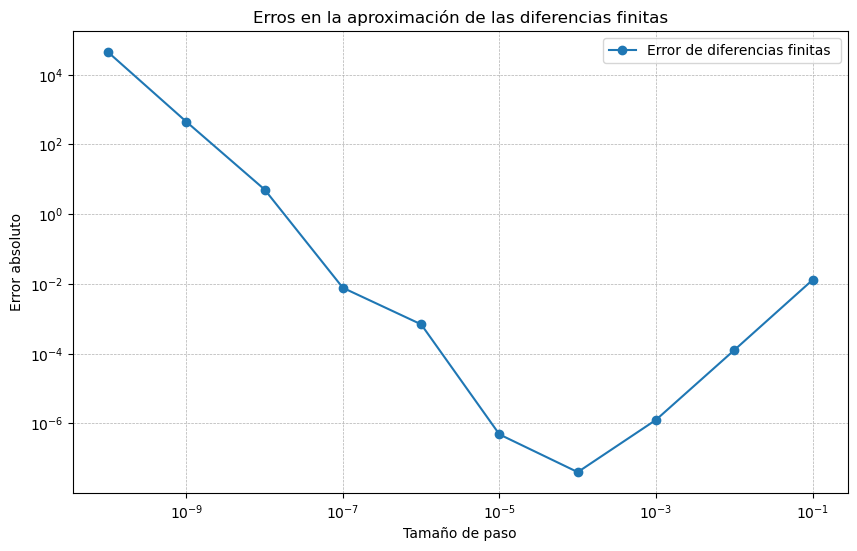

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sin, cos

### Definimos la función a evaluar 

def f(x):
    return exp(sin(2 * x))

#### Hacemos la segunda derivada de manera analitica
def f_ds(x):
    return 4 * exp(sin(2 * x)) * (cos(2 * x)**2 - sin(2 * x))


### Usando la definición de derivada y adaptandola a la derivada doble tenemos que: 
def calc_df(f, x, h):
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

x = 0.5
an = f_ds(x)
hs = [10**(-i) for i in range(1, 11)]

error = [abs(calc_df(f, x, h) - an) for h in hs]

plt.figure(figsize=(10, 6))
plt.loglog(hs, error, 'o-', label='Error de diferencias finitas ')
plt.xlabel('Tamaño de paso')
plt.ylabel('Error absoluto')
plt.title('Erros en la aproximación de las diferencias finitas')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


#### 3.10 We will see how to implement the gradient of a scalar function using Python lists:
#### (a) Write a Python function to compute the gradient ∇φ(x) via a forward-difference approximation, as per Eq. (5.108). This should work for any scalar function; test it on the φ(x)
#### (b) Use your new function to plot $\dfrac{\partial\phi}{\partial y} ~~~ \dfrac{\partial\phi}{\partial x}$ in a format 

100 100


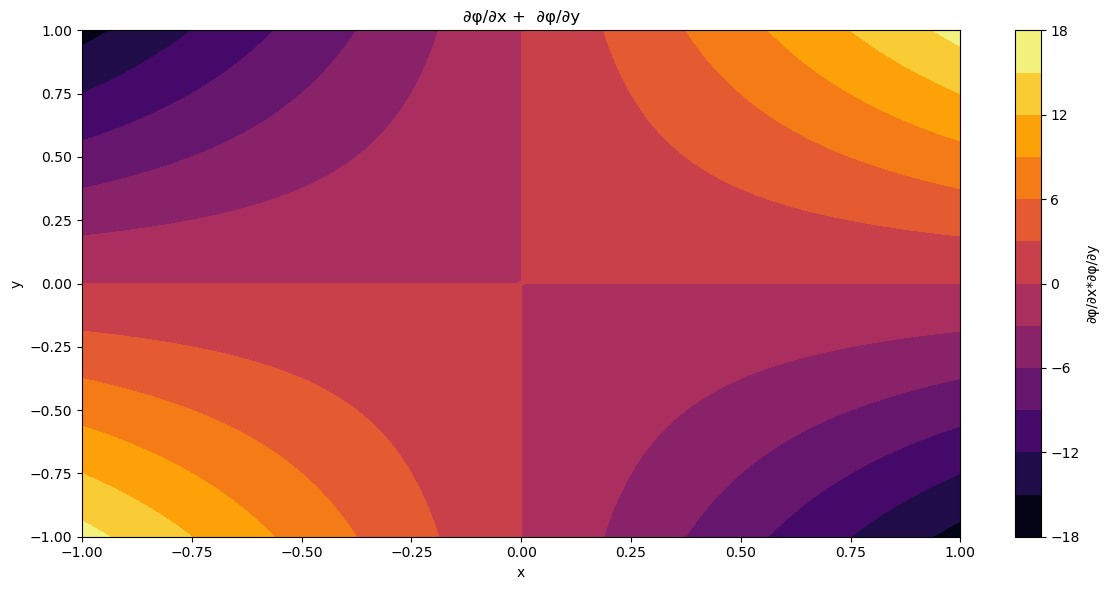

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def phi(x, y):
    return 2*x**2 + 2*y**2

def gradiente(phi, x, y, h):
    dphi_dx = (phi(x + h, y) - phi(x, y)) / h
    dphi_dy = (phi(x, y + h) - phi(x, y)) / h
    return dphi_dx, dphi_dy
 
def Gradiente_r2(phi, x_range, y_range, h):
    x_values = np.linspace(x_range[0], x_range[1], 100)
    y_values = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x_values, y_values)
    
    grad_x = np.zeros_like(X)
    grad_y = np.zeros_like(Y)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            grad_x[i, j], grad_y[i, j] = gradiente(phi, X[i, j], Y[i, j], h)
    print(X.shape[0], X.shape[1])
    return X, Y, grad_x, grad_y

h = 1e-10
x_range = (-1, 1)
y_range = (-1, 1)


X, Y, grad_x, grad_y = Gradiente_r2(phi, x_range, y_range, h)

plt.figure(figsize=(12, 6))

plt.contourf(X, Y, grad_x*grad_y, levels=10, cmap='inferno')
plt.colorbar(label='∂φ/∂x*∂φ/∂y')
plt.title('∂φ/∂x +  ∂φ/∂y')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()


#### 3.13 Produce a table of xi and esin(2xi) values, where xi goes from 0 to 1.6 in steps of 0.08.
#### (a) Plot the forward-difference and central-difference results (for the first derivative) given these values. (Hint: if you cannot produce a result for a specific x, don’t.) Then, introduce a curve for the analytical derivative.
#### (b) Use Richardson extrapolation for the forward difference for points on a grid and
#### add an extra set of points to the plot. You can use:
$Rf d = 2D_{fd}(h) − D_{fd}(2h) + O(h2)$

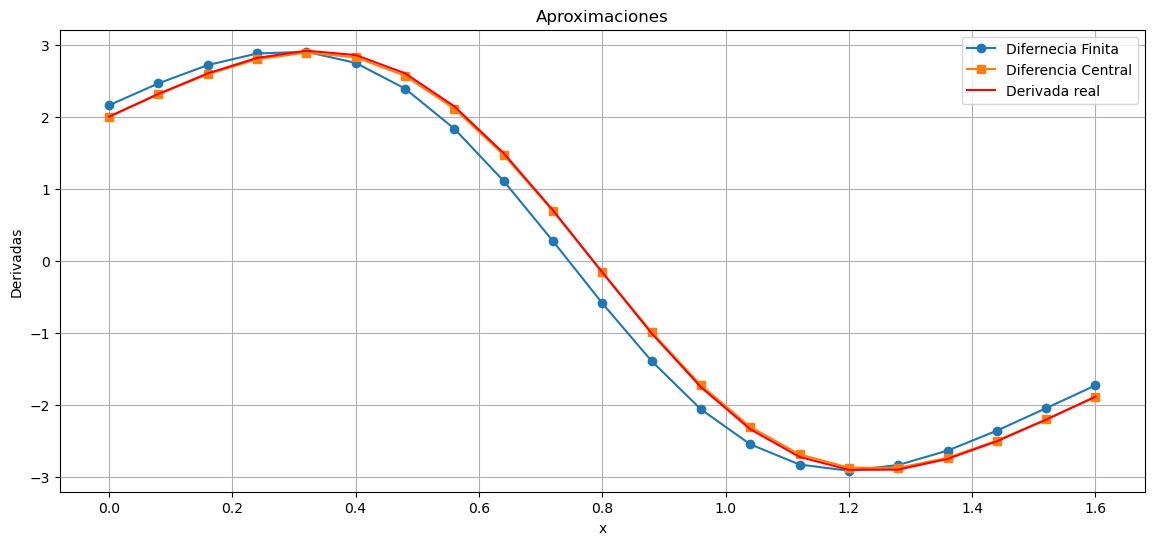

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos a nuesta función usando numpy para guardarlo como un arreglo 
def f(x):
    return np.exp(np.sin(2 * x))

# Definimos a nuestra derivada analitica
def df(x):
    return 2 * np.exp(np.sin(2 * x)) * np.cos(2 * x)

### Definimos las equis  usando los incrementos las cuales va a correr nuestro programa
h = 0.08

#### Creamos un arreglo donde ubicaremos  los valores de las x´s
x_valores = np.arange(0, 1.6 + h, h)

# Calculamos diferencias finitas utilizando la función f  
def calcu_fd(x, h):
    return (f(x + h) - f(x)) / h

#  Calculamos diferencias centrales utilizando la función f
def calcu_cd(x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Calculamos las derivadas usando las aproximaciones obtenidas anteriormente
f_df_ade = np.array([calcu_fd(x, h) for x in x_valores[:]])
f_df_cen = np.array([calcu_cd(x, h) for x in x_valores[:]])
df_val = df(x_valores[:])

### Ploteamos nuestros  resultados

plt.figure(figsize=(14, 6))
plt.plot(x_valores, f_df_ade, 'o-', label='Difernecia Finita')
plt.plot(x_valores, f_df_cen, 's-', label='Diferencia Central')
plt.plot(x_valores, df_val, 'r-', label='Derivada real')
plt.xlabel('x')
plt.ylabel('Derivadas')
plt.title('Aproximaciones')
plt.legend()
plt.grid(True)
plt.show()

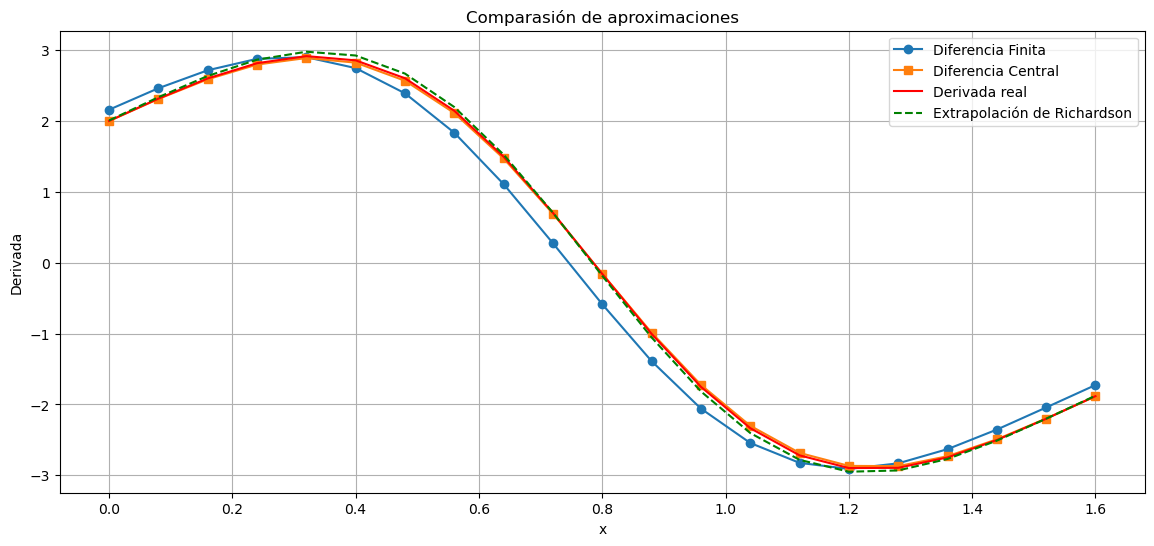

In [8]:
####b)
import  numpy as np
import matplotlib.pyplot as plt

# Definimos a nuestra derivada analitica
def df(x):
    return 2 * np.exp(np.sin(2 * x)) * np.cos(2 * x)

#### Reciclamos una función anterior la cual es la definición de nuestra derivada
def calcu_fd(x, h):
    return (f(x + h) - f(x)) / h

#  Calculamos diferencias centrales utilizando la función f
def calcu_cd(x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

#### Creamos las x que vamos a ocupar con sus respectivos pasos
h= 0.08
x_valores = np.arange(0, 1.6 + h, h)

#### Usando la función anterior, creamos una nueva función escrita en el libro
#### La cual calcula la extrapolación de richarson con los valores de nuestro respectivo intervalo en x 
def rh_extra(x, h):
    Df_d_h = np.array([calcu_fd(x_i, h) for x_i in x_valores[:]])
    Df_d_2h = np.array([calcu_fd(x_i, 2 * h) for x_i in x_valores[:]])
    return 2 * Df_d_h - Df_d_2h

####  Calculamos las derivadas usando las aproximaciones obtenidas anteriormente
f_df_ade = np.array([calcu_fd(x, h) for x in x_valores[:]])
f_df_cen = np.array([calcu_cd(x, h) for x in x_valores[:]])
df_val = df(x_valores[:])
f_df_r= rh_extra(x_valores, h)

plt.figure(figsize=(14, 6))
plt.plot(x_valores[:], f_df_ade, 'o-', label='Diferencia Finita')
plt.plot(x_valores[:], f_df_cen, 's-', label='Diferencia Central')
plt.plot(x_valores[:], df_val, 'r-', label='Derivada real')
plt.plot(x_valores[:], f_df_r, 'g--', label='Extrapolación de Richardson')

plt.xlabel('x')
plt.ylabel('Derivada')
plt.title('Comparasión de aproximaciones')
plt.legend()
plt.grid(True)
plt.show()


#### 03.20 This problem studies the classical and quantum harmonic oscillators.
#### (a) For the classical oscillator, take the solution x = x0 sin(ωt), which assumes that the particle is at x = 0 at t = 0. Calculate Pc(x) by determining what fraction of the total time the particle will spend in an interval dx around x. In other words, use the relation Pc(x)dx = dt/T, where T is the period of oscillation.17
#### (b) Plot the squares of the quantum harmonic oscillator eigenfunctions for n =3, 10, 20, 150 and compare with the classical solution(s).

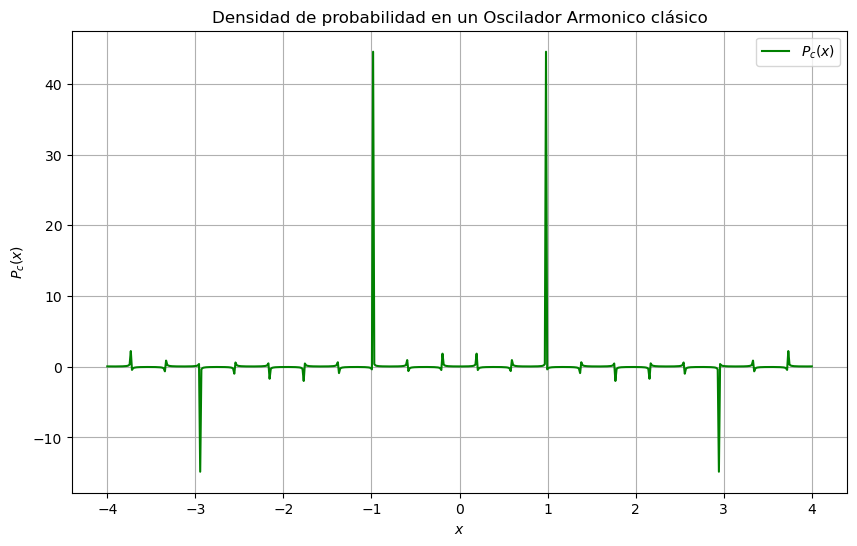

In [9]:
import numpy as np
import matplotlib.pyplot as plt

### Definimos las variables de nuestro problema
x0 = 4
omega = 8
### Sabemos que el periodo es 2*pi/ \omega así que lo reescribimos de esa manera
T = 2 * np.pi / omega  

### Definimos a la función que depende de t
def x_t(t):
    return x0 * np.sin(omega * t)

#### Definimos su derivada
def dx_dt(t):
    return x0 * omega * np.cos(omega * t)

#### Definimos la probabilidad de distribución
def Pc(x):
    return 1/(T*dx_dt(x))

# Values for x
x_valores = np.linspace(-x0, x0, 600)
Pc_valor = np.array([Pc(x) for x in x_valores])

# Plot Pc(x)
plt.figure(figsize=(10, 6))
plt.plot(x_valores, Pc_valor, label='$P_c(x)$', color='green')
plt.xlabel('$x$')
plt.ylabel('$P_c(x)$')
plt.title('Densidad de probabilidad en un Oscilador Armonico clásico')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
#### b) 
from math import sqrt, pi, factorial, exp
import cmath

def hermite(n, x):
    val0 = 1.0
    val1 = 2 * x
    for j in range(1, n):
        val2 = 2 * x * val1 - 2 * j * val0
        val0, val1 = val1, val2
    dval2 = 2 * n * val0
    return val2, dval2

def psiqho(x, nametoval):
    n = nametoval["n"]
    momohbar = nametoval["momohbar"]
    al = nametoval["al"]
    norm = momohbar**0.25 / sqrt(2**n * factorial(n) * sqrt(pi))
    psival = norm * exp(-0.5 * al * momohbar * x**2) * hermite(n, sqrt(momohbar) * x)[0]
    return psival

def psibox(x, nametoval):
    n = nametoval["n"]
    boxl = nametoval["boxl"]
    return cmath.exp(2 * pi * n * x * 1j / boxl) / sqrt(boxl)

if __name__ == '__main__':
    x = 1.0
    nametoval_qho = {"n": 3, "momohbar": 1.0, "al": 1.0}
    nametoval_qho_1 = {"n": 10, "momohbar": 1.0, "al": 1.0}
    nametoval_qho_2 = {"n": 20, "momohbar": 1.0, "al": 1.0}
    nametoval_qho_3 = {"n": 150, "momohbar": 1.0, "al": 1.0}
    
    psiA = psiqho(x, nametoval_qho)
    psiB = psiqho(x, nametoval_qho_1)
    psiC = psiqho(x, nametoval_qho_2)
    psiD = psiqho(x, nametoval_qho_3)

    print(f"Wavefunction of Quantum Harmonic Oscillator at x = {x}: {psiA}")
    print(f"Wavefunction of Quantum Harmonic Oscillator at x = {x}: {psiB}")
    print(f"Wavefunction of Quantum Harmonic Oscillator at x = {x}: {psiC}")
    print(f"Wavefunction of Quantum Harmonic Oscillator at x = {x}: {psiD}")


Wavefunction of Quantum Harmonic Oscillator at x = 1.0: -0.26302962362333343
Wavefunction of Quantum Harmonic Oscillator at x = 1.0: 0.06146344487883041
Wavefunction of Quantum Harmonic Oscillator at x = 1.0: 0.3158164750772352
Wavefunction of Quantum Harmonic Oscillator at x = 1.0: -0.011692949742862228


####  3.25 write kinetic() to use the second central-difference formula for the second derivative (fromproblem3.15). Compare your answers to what you get in kinetic.py for both the harmonic-oscillator and the periodic-boundary cases.

In [11]:
from math import pi

def psiqho(x, nametoval):
    n = nametoval["n"]
    momohbar = nametoval["momohbar"]
    al = nametoval["al"]
    norm = momohbar**0.25 / sqrt(2**n * factorial(n) * sqrt(pi))
    psival = norm * exp(-0.5 * al * momohbar * x**2) * hermite(n, sqrt(momohbar) * x)[0]
    return psival

def psibox(x, nametoval):
    n = nametoval["n"]
    boxl = nametoval["boxl"]
    return cmath.exp(2 * pi * n * x * 1j / boxl) / sqrt(boxl)

def kinetic(psi, x, nametoval, h=0.005):
    hom = 1.0
    psiold = psi(x, nametoval)
    psip = psi(x + h/2, nametoval)
    psim = psi(x - h/2, nametoval)
    lapl = 4*(psip  + psim - 2.0 * psiold) / h**2
    kin = -0.5 * hom * lapl / psiold
    return kin

def test_kinetic():
    x = 1.0
    hs = [10**(-i) for i in range(1, 6)]
    
    nametoval_qho = {"n": 100, "momohbar": 1.0, "al": 1.0}
    qhos = [kinetic(psiqho, x, nametoval_qho, h) for h in hs]
    
    nametoval_box = {"n": -2, "boxl": 2 * pi}
    boxs = [kinetic(psibox, x, nametoval_box, h) for h in hs]
    
    rowf = "{0:1.0e} {1:1.16f} {2:1.16f}"
    print("h         QHO                  Box")
    for h, qho, box in zip(hs, qhos, boxs):
        print(rowf.format(h, qho, box))

if __name__ == '__main__':
    test_kinetic()
    


h         QHO                  Box
1e-01 95.7061387946587843 1.9983338887897026+0.0000000000000154j
1e-02 99.9562796970102454 1.9999833333906443-0.0000000000041381j
1e-03 99.9995627045465909 1.9999998333042277-0.0000000003594387j
1e-04 99.9999836662433665 1.9999999922332246+0.0000000402402327j
1e-05 100.0004787558773813 2.0000025017583209-0.0000004945386953j


#### 3.25 Examine the derivative of a noisy function (e.g., from imperfectly measuring a particle’s velocity vi at different time slices ti). Since we haven’t talked about random numbers yet, we will model the effect of the noise by superimposing a highly oscillatory behavior on a slowly varying function. To make things concrete, let us study:f (x) = 2 + 5 sin x + 0.1 sin(30x)  The last term has a small amplitude, but contains strong oscillations which have a dramatic effect on the function’s derivative. Take 128 points placed on an equally spaced grid from 0 to 2π and produce a table of values, (xi, f (xi)).
#### (a) Plot f (x) together with g(x), where g(x) does not contain the third (highly oscillatory) term. Observe that the two curves basically lie on top of each other.
#### (b) Create a plot that contains: (i) the analytically computed f ′(x), (ii) the analytically computed g′(x), and (iii) the forward-difference approximation to f ′(x), using adjacent points on your grid. Observe that both the analytical f ′(x) and the forward-difference approximation to it are highly oscillatory and therefore quite different from the “underlying” behavior of g′(x).
#### (c) Introduce a new set of points into your latest plot: (iv) the forward-differenceapproximation to f ′(x), using grid points which are twice removed (e.g., to estimate the derivative at x10 you use the function values at x12 and x10). Observe that this set of points exhibits “noise” with smaller amplitude; this is because we have employed a larger step size h and have thereby smoothed out some of the “unphysical” oscillations due to the third term. (Parts (b) and (c) are employing the forward-difference approximation, i.e., we were able to do a better job without turning to a better finite-difference approximation.)

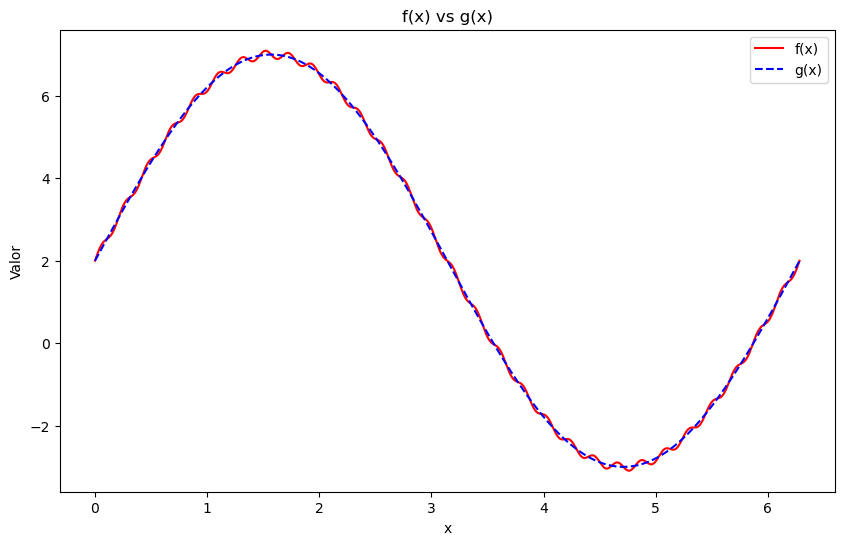

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Vamos a utilizar np. para generar nuestras x´s. 
N = 5000
x = np.linspace(0, 2 * np.pi, N)
f_x = 2 + 5 * np.sin(x) + 0.1 * np.sin(30 * x)
g_x = 2 + 5 * np.sin(x)
#### Generamos la grafica
plt.figure(figsize=(10, 6))
plt.plot(x, f_x, label='f(x)', color='red')
plt.plot(x, g_x, label='g(x)', color='blue', linestyle='--')
plt.xlabel('x')
plt.ylabel('Valor')
plt.title('f(x) vs g(x)')
plt.legend()
plt.show()

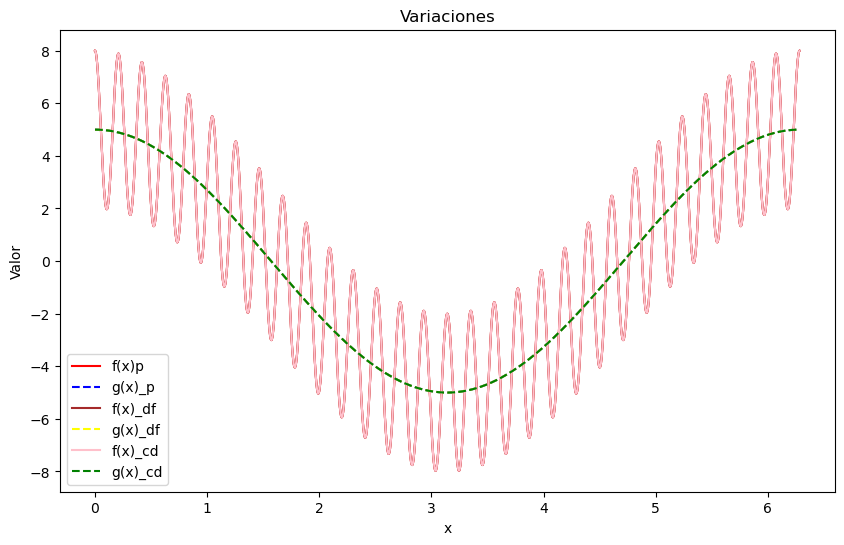

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#Usando numpy escribimos la función a derivar
def f(x):
    return 2 + 5 * np.sin(x) + 0.1 * np.sin(30 * x)
def g(x): 
    return 2 + 5 * np.sin(x)
def fprime(x):
    return  5 * np.cos(x) + 3.0* np.cos(30 * x)
def gprime(x):
    return  5 * np.cos(x)

def calc_fd(f, x, h):
    return (f(x + h) - f(x)) / h

def calc_cd(f, x, h):
    return (f(x + h / 2) - f(x - h / 2)) / h

### Definimos los valores los cuales va a tomar nuestras funciones
N = 3000
h = 0.0001
x = np.linspace(0, 2 * np.pi, N)
f_x = fprime(x)
g_x = gprime(x)
f_dfx =  calc_fd(f, x, h)
g_dfx =  calc_fd(g, x, h)
f_dcx =  calc_cd(f, x, h)
g_dcx =  calc_cd(g, x, h)

plt.figure(figsize=(10, 6))
plt.plot(x, f_x, label='f(x)p', color='red')
plt.plot(x, g_x, label='g(x)_p', color='blue', linestyle='--')
plt.plot(x, f_dfx, label='f(x)_df', color='brown')
plt.plot(x, g_dfx, label='g(x)_df', color='yellow', linestyle='--')
plt.plot(x, f_dcx, label='f(x)_cd', color='pink')
plt.plot(x, g_dcx, label='g(x)_cd', color='green', linestyle='--')
plt.xlabel('x')
plt.ylabel('Valor')
plt.title('Variaciones')
plt.legend()
plt.show()

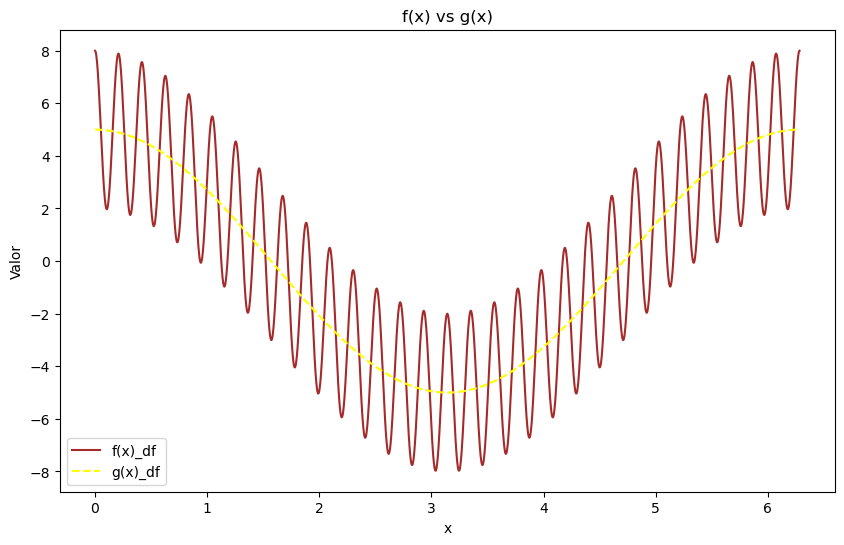

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#Usando numpy escribimos la función a derivar
def f(x):
    return 2 + 5 * np.sin(x) + 0.1 * np.sin(30 * x)
def g(x): 
    return 2 + 5 * np.sin(x)
def fprime(x):
    return  5 * np.cos(x) + 3.0* np.cos(30 * x)
def gprime(x):
    return  5 * np.cos(x)

def calc_fd(f, x, h):
    return (f(x + h) - f(x)) / h

def calc_cd(f, x, h):
    return (f(x + h / 2) - f(x - h / 2)) / h

N = 3000
h = 0.0001
x = np.linspace(0, 2 * np.pi, N)
f_x = fprime(x)
g_x = gprime(x)
f_dfx =  calc_fd(f, x, h)
g_dfx =  calc_fd(g, x, h)
f_dcx =  calc_cd(f, x, h)
g_dcx =  calc_cd(g, x, h)

plt.figure(figsize=(10, 6))
plt.plot(x, f_dfx, label='f(x)_df', color='brown')
plt.plot(x, g_dfx, label='g(x)_df', color='yellow', linestyle='--')
plt.xlabel('x')
plt.ylabel('Valor')
plt.title('f(x) vs g(x) Diferencias Finitas')
plt.legend()
plt.show()


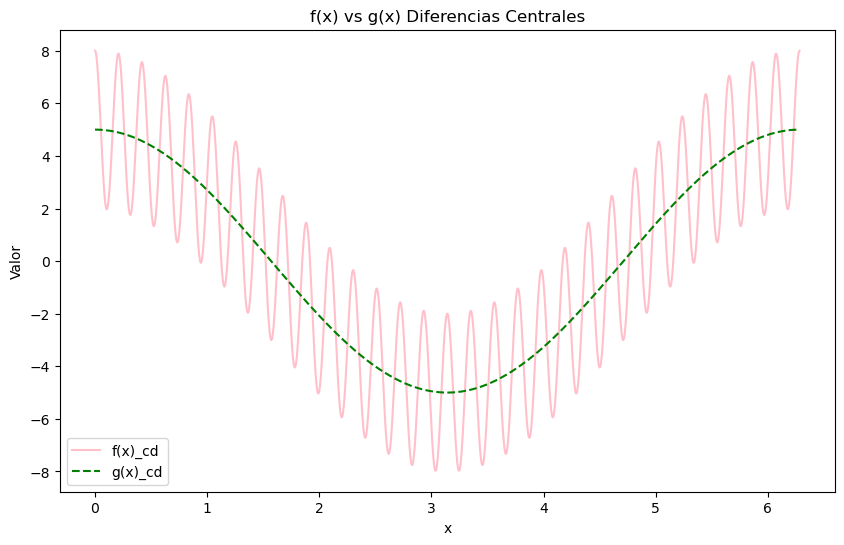

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#Usando numpy escribimos la función a derivar
def f(x):
    return 2 + 5 * np.sin(x) + 0.1 * np.sin(30 * x)
def g(x): 
    return 2 + 5 * np.sin(x)
def fprime(x):
    return  5 * np.cos(x) + 3.0* np.cos(30 * x)
def gprime(x):
    return  5 * np.cos(x)

def calc_fd(f, x, h):
    return (f(x + h) - f(x)) / h

def calc_cd(f, x, h):
    return (f(x + h / 2) - f(x - h / 2)) / h

N = 3000
h = 0.0001
x = np.linspace(0, 2 * np.pi, N)
f_x = fprime(x)
g_x = gprime(x)
f_dfx =  calc_fd(f, x, h)
g_dfx =  calc_fd(g, x, h)
f_dcx =  calc_cd(f, x, h)
g_dcx =  calc_cd(g, x, h)

plt.figure(figsize=(10, 6))
plt.plot(x, f_dcx, label='f(x)_cd', color='pink')
plt.plot(x, g_dcx, label='g(x)_cd', color='green', linestyle='--')
plt.plot(x, f_prime, label='f(x)_cd', color='')
plt.plot(x, g_prime, label='g(x)_cd', color='green', linestyle='--')
plt.xlabel('x')
plt.ylabel('Valor')
plt.title('f(x) vs g(x) Diferencias Centrales')
plt.legend()
plt.show()
